# Sales Forecast Model

## Data preparation and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Load sales_orders excel
sales_orders_df = pd.read_csv('/Users/diegomarroquin/tobipets_sales_forecast/data/sales_orders_cleaned.csv')
sales_orders_df

,Unnamed: 0,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...,...
6064,6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [15]:
# Step 2: Data Exploration
print(sales_orders_df.head())  # Display the first few rows of the data
print(sales_orders_df.describe())  # Calculate summary statistics

   Unnamed: 0        SKU order_number           order_date date_received  \
0           0  1spFC1796       03-031  2022-01-03 00:00:00    2022-01-06   
1           1  1spFC3798       03-031  2022-01-03 00:00:00    2022-01-06   
2           2  1sgFC2792       03-031  2022-01-03 00:00:00    2022-01-06   
3           3  1sgFC2782       03-031  2022-01-03 00:00:00    2022-01-06   
4           4  1sgFC3790       03-031  2022-01-03 00:00:00    2022-01-06   

             provider       brand  \
0  Herrera y Elizondo  1st CHOICE   
1  Herrera y Elizondo  1st CHOICE   
2  Herrera y Elizondo  1st CHOICE   
3  Herrera y Elizondo  1st CHOICE   
4  Herrera y Elizondo  1st CHOICE   

                                        product_name  units_ordered  \
0  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
1  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
2                    Gato Control de Peso - 5.44, kg              2   
3            Gato Indoor Vitality (P

In [3]:
# Drop the unnamed column
sales_orders_df = sales_orders_df.copy().drop('Unnamed: 0', axis=1)
sales_orders_df

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...
6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [7]:
# Step 2: Data Exploration
print(sales_orders_df.head())  # Display the first few rows of the data
print(sales_orders_df.describe())  # Calculate summary statistics

         SKU order_number           order_date date_received  \
0  1spFC1796       03-031  2022-01-03 00:00:00    2022-01-06   
1  1spFC3798       03-031  2022-01-03 00:00:00    2022-01-06   
2  1sgFC2792       03-031  2022-01-03 00:00:00    2022-01-06   
3  1sgFC2782       03-031  2022-01-03 00:00:00    2022-01-06   
4  1sgFC3790       03-031  2022-01-03 00:00:00    2022-01-06   

             provider       brand  \
0  Herrera y Elizondo  1st CHOICE   
1  Herrera y Elizondo  1st CHOICE   
2  Herrera y Elizondo  1st CHOICE   
3  Herrera y Elizondo  1st CHOICE   
4  Herrera y Elizondo  1st CHOICE   

                                        product_name  units_ordered  \
0  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
1  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
2                    Gato Control de Peso - 5.44, kg              2   
3            Gato Indoor Vitality (Pollo) - 5.44, kg              1   
4                            Gato Uri

In [8]:
sales_orders_df

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...
6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [9]:
sales_orders_df.describe()

,units_ordered,orders_received
count,6069.000000,6069.000000
mean,3.982699,3.343220
std,7.206750,7.167987
min,-10.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,300.000000,300.000000


In [10]:
sales_orders_df.isna().sum()

SKU                0
order_number       0
order_date         0
date_received      0
provider           0
brand              0
product_name       0
units_ordered      0
orders_received    0
dtype: int64

## ARIMA 
(Autoregressive Integrated Moving Average): ARIMA models are widely used for time series forecasting. They can capture the autocorrelation and trend in the data.

### Feature Engineering

In [11]:
# Step 3: Feature Engineering
data = sales_orders_df.copy()
data['order_date'] = pd.to_datetime(data['order_date'])  # Convert 'order_date' column to datetime type
data['month'] = data['order_date'].dt.month  # Extract the month from 'order_date'
data.head()

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received,month
0,1spFC1796,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5,1
1,1spFC3798,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5,1
2,1sgFC2792,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2,1
3,1sgFC2782,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1,1
4,1sgFC3790,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1,1


### Training

In [12]:
# Step 4: Splitting the Data
train_size = int(len(data) * 0.8)  # Use 80% of the data for training
train_data = data[:train_size]
test_data = data[train_size:]

In [13]:
# Step 5: Model Selection
model = ARIMA(train_data['units_ordered'], order=(1, 0, 0))  # ARIMA(1, 0, 0) model
model_fit = model.fit()

In [14]:
# Step 6: Model Training and Evaluation
predictions = model_fit.predict(start=train_size, end=len(data) - 1)
mse = mean_squared_error(test_data['units_ordered'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 6.4575056141979825


In [15]:
# Step 7: Model Fine-tuning (optional)

# Step 8: Forecasting
future_dates = pd.date_range(start=data['order_date'].max(), periods=12, freq='M')  # Forecasting for the next 12 months
forecast = model_fit.predict(start=len(data), end=len(data) + 11)

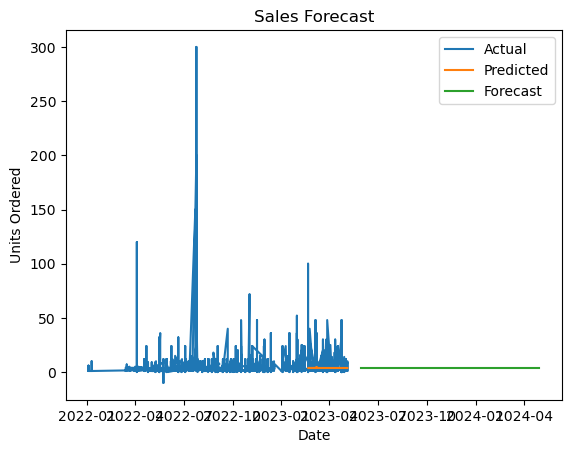

In [16]:
# Step 9: Monitor and Refine

# Visualization
plt.plot(data['order_date'], data['units_ordered'], label='Actual')
plt.plot(test_data['order_date'], predictions, label='Predicted')
plt.plot(future_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Units Ordered')
plt.title('Sales Forecast')
plt.legend()
plt.show()

## SARIMA (Seasonal ARIMA):
SARIMA models extend ARIMA models to handle seasonal patterns in the data.

In [17]:
# Step 3: Preprocessing
sarima_data = sales_orders_df.copy()
sarima_data['order_date'] = pd.to_datetime(sarima_data['order_date'])
sarima_data = sarima_data.set_index('order_date')

In [18]:
# Step 4: Splitting the Data
train_data = sarima_data['units_ordered'].iloc[:-12]  # Use all sarima_data except the last 12 months for training
test_data = sarima_data['units_ordered'].iloc[-12:]  # Use the last 12 months for testing

In [19]:
# Step 5: Model Training
model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51514D+00    |proj g|=  7.09246D-02

At iterate    5    f=  3.39065D+00    |proj g|=  7.94028D-02

At iterate   10    f=  3.37484D+00    |proj g|=  4.26605D-03

At iterate   15    f=  3.37313D+00    |proj g|=  5.26991D-03

At iterate   20    f=  3.37285D+00    |proj g|=  7.64377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   5.489D-06   3.373D+00
  F =   3.3728528345011295     

CONVERG

In [20]:
# Step 6: Model Evaluation
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
mse = mean_squared_error(test_data, predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 2.4993599693927666


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


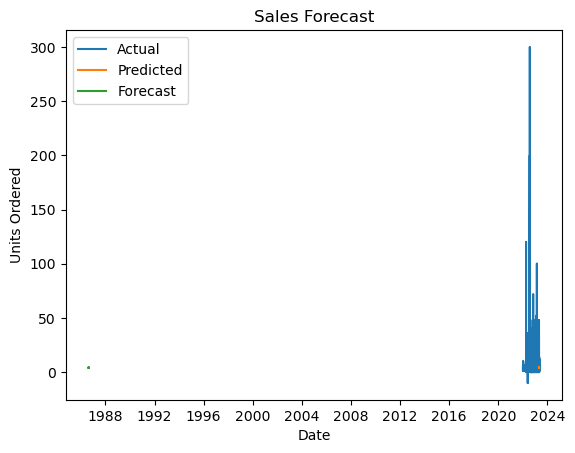

In [21]:
# Step 7: Forecasting
forecast = model_fit.predict(start=len(sarima_data), end=len(sarima_data) + 11)

# Visualization
plt.plot(sarima_data.index, sarima_data['units_ordered'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Units Ordered')
plt.title('Sales Forecast')
plt.legend()
plt.show()

# ML Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
# Step 1: Data Preparation
ml_models = sales_orders_df.copy()
ml_models.head()

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1


In [38]:
# Select relevant features and target variable
features = ['SKU', 'brand', 'product_name']
target = 'units_ordered'
ml_models = ml_models.copy()[features + [target]]
ml_models

,SKU,brand,product_name,units_ordered
0,1spFC1796,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5
1,1spFC3798,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5
2,1sgFC2792,1st CHOICE,"Gato Control de Peso - 5.44, kg",2
3,1sgFC2782,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1
4,1sgFC3790,1st CHOICE,"Gato Urinario - 1.8, kg",1
...,...,...,...,...
6064,-,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2
6065,ScpSD3032,Science Diet,"Adulto Chicken And Barley - 15, kg",2
6066,Scgsm2138,Science Diet,"z/d® Feline - 1.81, g",2
6067,ScpSD31535,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2


In [39]:
# Handle categorical variables
label_encoder = LabelEncoder()
ml_models['SKU'] = label_encoder.fit_transform(ml_models['SKU'])
ml_models['brand'] = label_encoder.fit_transform(ml_models['brand'])
ml_models['product_name'] = label_encoder.fit_transform(ml_models['product_name'])
ml_models

,SKU,brand,product_name,units_ordered
0,17,1,127,5
1,32,1,130,5
2,8,1,875,2
3,5,1,882,1
4,13,1,891,1
...,...,...,...,...
6064,0,100,67,2
6065,1013,100,90,2
6066,993,100,1874,2
6067,1030,100,75,2


## Train test split

In [40]:
# Split the ml_models into training and testing sets
X = ml_models.drop(target, axis=1)
y = ml_models[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

### Linear regression

In [41]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
linear_regression_predictions = linear_regression.predict(X_test_scaled)

linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)

print("Linear Regression Scores:")
print("MSE:", linear_regression_mse)
print("RMSE:", linear_regression_rmse)
print("R2 Score:", linear_regression_r2)

Linear Regression Scores:
MSE: 43.10903340075735
RMSE: 6.565746979648039
R2 Score: 0.007267717640072058


### Random Forest

In [42]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)

random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print("Random Forest Regression Scores:")
print("MSE:", random_forest_mse)
print("RMSE:", random_forest_rmse)
print("R2 Score:", random_forest_r2)


Random Forest Regression Scores:
MSE: 35.72637592037347
RMSE: 5.977154500293051
R2 Score: 0.17727854442549296


### GBR

In [43]:
# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)

gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)

print("Gradient Boosting Regression Scores:")
print("MSE:", gradient_boosting_mse)
print("RMSE:", gradient_boosting_rmse)
print("R2 Score:", gradient_boosting_r2)

Gradient Boosting Regression Scores:
MSE: 41.59411998966864
RMSE: 6.449350354079754
R2 Score: 0.04215375728255066


### SVR

In [44]:
# SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_predictions = svr.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_predictions)

print("SVR Scores:")
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("R2 Score:", svr_r2)

SVR Scores:
MSE: 42.82247169401565
RMSE: 6.543888117473865
R2 Score: 0.013866776694030025


### NNR

In [45]:
# Neural Network Regression
neural_network = MLPRegressor(hidden_layer_sizes=(100, 100))
neural_network.fit(X_train_scaled, y_train)
neural_network_predictions = neural_network.predict(X_test_scaled)

neural_network_mse = mean_squared_error(y_test, neural_network_predictions)
neural_network_rmse = np.sqrt(neural_network_mse)
neural_network_r2 = r2_score(y_test, neural_network_predictions)

print("Neural Network Regression Scores:")
print("MSE:", neural_network_mse)
print("RMSE:", neural_network_rmse)
print("R2 Score:", neural_network_r2)

Neural Network Regression Scores:
MSE: 39.19615209280187
RMSE: 6.260683037241374
R2 Score: 0.09737513330256065


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Preprocess the data
# data = pd.read_csv("sales_data.csv")
data = sales_orders_df.copy()
data = data.groupby("brand")["units_ordered"].sum()
data


brand
#ERROR!       105
1st CHOICE    836
Activcat        5
Alcames        23
Alpo           23
             ... 
Zoetis        200
Zoofarma        4
Zooneee         4
kong            6
unimedical      6
Name: units_ordered, Length: 128, dtype: int64

In [6]:
# Step 2: Explore the data
# ... (optional)

# Step 3: Split the data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Step 4: Choose a forecasting model
model = ARIMA(train_data, order=(1, 1, 1))  # Example: ARIMA model with order (1, 1, 1)

# Step 5: Train the model
model_fit = model.fit()

# Step 6: Make predictions
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Step 7: Evaluate the model
mae = abs(forecast - test_data).mean()
rmse = ((forecast - test_data) ** 2).mean() ** 0.5

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Step 8: Generate future forecasts
future_forecast = model_fit.predict(start=len(data), end=len(data) + 5)  # Example: Generate forecasts for the next 5 periods
print("Future Forecasts:")
print(future_forecast)

Mean Absolute Error: nan
Root Mean Squared Error: nan
Future Forecasts:
128    205.515543
129    205.515543
130    205.515543
131    205.515543
132    205.515543
133    205.515543
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results 

In [23]:
data = sales_orders_df.copy()

# Group the data by brand and calculate the total units_ordered and orders_received per brand
brand_data = data.groupby('brand').agg({'units_ordered': 'sum', 'orders_received': 'sum'}).reset_index()

# Split the data into features (units_ordered) and target (orders_received)
X = brand_data[['units_ordered']]
y = brand_data['orders_received']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict the sales based on units_ordered
brand_data['sales_forecast'] = model.predict(X)

# Print the sales forecast for each brand
print(brand_data[['brand', 'sales_forecast']])

          brand  sales_forecast
0       #ERROR!       91.852175
1    1st CHOICE      673.118198
2      Activcat       12.335619
3       Alcames       26.648599
4          Alpo       26.648599
..          ...             ...
123      Zoetis      167.392903
124    Zoofarma       11.540454
125     Zooneee       11.540454
126        kong       13.130785
127  unimedical       13.130785

[128 rows x 2 columns]


In [24]:
from datetime import datetime, timedelta
data = sales_orders_df.copy()
# Group the data by brand and calculate the total units_ordered and orders_received per brand
brand_data = data.groupby('brand').agg({'units_ordered': 'sum', 'orders_received': 'sum'}).reset_index()

# Split the data into features (units_ordered) and target (orders_received)
X = brand_data[['units_ordered']]
y = brand_data['orders_received']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Generate dates for the next 6 months
start_date = datetime.now().date()
dates = [start_date + timedelta(days=30*i) for i in range(6)]

# Create a DataFrame to store the sales forecast
forecast_data = pd.DataFrame({'date': dates})

# Predict the sales for each brand based on units_ordered
forecast_data['brand'] = brand_data['brand']
forecast_data['units_ordered'] = brand_data['units_ordered']
forecast_data['sales_forecast'] = model.predict(forecast_data[['units_ordered']])

# Print the sales forecast for each brand for the next 6 months
print(forecast_data[['brand', 'date', 'sales_forecast']])

           brand        date  sales_forecast
0        #ERROR!  2023-07-04       91.852175
1     1st CHOICE  2023-08-03      673.118198
2       Activcat  2023-09-02       12.335619
3        Alcames  2023-10-02       26.648599
4           Alpo  2023-11-01       26.648599
5  Animal Planet  2023-12-01       10.745288


In [32]:
print(sales_orders_df["brand"].unique().tolist())
sales_orders_df

['1st CHOICE', 'ArtriTabs', 'Broadline', 'Interfarma', 'KittyAid', 'Merial', 'Unimedical', 'Taste Of The Wild', 'Diamond', 'Kong', 'ZeeDog', '#ERROR!', 'NutriSource', 'NexGard', 'ZeeCat', 'M Pets', 'Basic Farma', 'Beaphar', 'Heartgard', 'QualiVet', 'Wellco', 'Alpo', 'Beneful', 'Cat Chow', 'Dentalife', 'Dog Chow', 'Fancy Feast', 'Felix', 'Pro Plan', 'Hills', 'Balance', 'Virbac', 'MasQPets', 'NOBA', 'Petlife', 'Royal Canin', 'Petilicious', 'En Paleta', 'Philozoo', 'Bravecto', 'Old Prince', 'Waldo', 'T-Bonz', 'For FAN Pets', 'Oh la la', 'Natural Pets', 'Tropiclean', 'Urine Off', 'King Komb', 'Snug Arooz', 'Himalaya', 'Easygroom', 'Cat It', 'Grizzly', 'Petmedica', 'Holliday', 'Calox', 'Lisan', 'Zoetis', 'Viyo', 'Alcames', 'Brouwer', 'Okap', 'Petguel', 'Pro Pac', 'Vet Life', 'Natural Wild', 'Monge Vet', 'Blue', 'Vida de Perro', 'Yotoo', 'LOLAS HOMEMADE', 'unimedical', 'Zoofarma', 'Pro Plan ', 'Mokas Treats', 'Natural pets', 'Ecolight', 'Nutri', 'Zawates', "Nature's Protection", 'Yotto', 'Ru

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...
6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [37]:
data = sales_orders_df.copy()

# Group the data by sku and calculate the total units_ordered and orders_received per sku
sku_data = data.groupby('SKU').agg({'units_ordered': 'sum', 'orders_received': 'sum'}).reset_index()

# Filter out invalid or missing brands
valid_sku = sku_data['SKU'].dropna().unique()
sku_data = sku_data[sku_data['SKU'].isin(valid_sku)]

# Split the data into features (units_ordered) and target (orders_received)
X = sku_data[['units_ordered']]
y = sku_data['orders_received']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Generate dates for the next 6 months
start_date = datetime.now().date()
dates = [start_date + timedelta(days=30 * i) for i in range(6)]

# Create empty lists to store the sales forecast for each sku
skus = []
sales_forecast = []

# Predict the sales for each sku based on units_ordered for each month
for _, row in sku_data.iterrows():
    sku = row['SKU']
    sku_units_ordered = row['units_ordered']
    sku_sales_forecast = model.predict([[sku_units_ordered]])[0]
    skus.extend([sku] * len(dates))
    sales_forecast.extend([sku_sales_forecast] * len(dates))

# Create a DataFrame to store the sales forecast
forecast_data = pd.DataFrame({
    'SKU': skus,
    'date': dates * len(sku_data),
    'sales_forecast': sales_forecast
})

# Print the sales forecast for each sku for each month
print(forecast_data)
forecast_data

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not ha

           SKU        date  sales_forecast
0            -  2023-07-04       25.696495
1            -  2023-08-03       25.696495
2            -  2023-09-02       25.696495
3            -  2023-10-02       25.696495
4            -  2023-11-01       25.696495
...        ...         ...             ...
8869  hezoOm56  2023-08-03        6.401849
8870  hezoOm56  2023-09-02        6.401849
8871  hezoOm56  2023-10-02        6.401849
8872  hezoOm56  2023-11-01        6.401849
8873  hezoOm56  2023-12-01        6.401849

[8874 rows x 3 columns]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not ha

,SKU,date,sales_forecast
0,-,2023-07-04,25.696495
1,-,2023-08-03,25.696495
2,-,2023-09-02,25.696495
3,-,2023-10-02,25.696495
4,-,2023-11-01,25.696495
...,...,...,...
8869,hezoOm56,2023-08-03,6.401849
8870,hezoOm56,2023-09-02,6.401849
8871,hezoOm56,2023-10-02,6.401849
8872,hezoOm56,2023-11-01,6.401849


In [38]:
print(forecast_data["SKU"].unique().tolist())


['-', '1sgFC2774', '1sgFC2775', '1sgFC2778', '1sgFC2781', '1sgFC2782', '1sgFC2785', '1sgFC2789', '1sgFC2792', '1sgFC3776', '1sgFC3779', '1sgFC3783', '1sgFC3787', '1sgFC3790', '1sgFC3793', '1spCH2636', '1spCH2637', '1spFC1796', '1spFC1798', '1spFC1799', '1spFC1803', '1spFC1818', '1spFC1826', '1spFC1834', '1spFC2100', '1spFC2710', '1spFC2800', '1spFC2810', '1spFC2815', '1spFC2835', '1spFC2837', '1spFC3033', '1spFC3798', '1spFC3805', '1spFC3811', '1spFC3816', '1spFC3820', '1spFC3836', 'Ald2236', 'Ald2237', 'AngEA3143', 'ArpAT11032', 'AyHiAN136', 'AyHiAN139', 'AyHiDI143', 'AyHiHI138', 'AyHiIM137', 'AyHiLI135', 'AyHiLi140', 'AyHiNE141', 'AyHiSC142', 'BadBY2765', 'BadBY2766', 'BadBY2767', 'BadBY2768', 'BadBY2769', 'BagBA2370', 'BagBA2371', 'BagBA2372', 'BagBA2382', 'BagBA3376', 'BagBA3377', 'BagBA3378', 'BagBA3384', 'BapBA1352', 'BapBA1354', 'BapBA1355', 'BapBA1360', 'BapBA1367', 'BapBA1368', 'BapBA1369', 'BapBA1385', 'BapBA1388', 'BapBA2340', 'BapBA2343', 'BapBA2347', 'BapBA2350', 'BapBA235

In [43]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Convert 'date_received' column to datetime type
sales_orders_df['date_received'] = pd.to_datetime(sales_orders_df['date_received'])

# Filter the sales orders data for the latest 6 months
latest_data = sales_orders_df[sales_orders_df['date_received'] >= (pd.Timestamp.now() - pd.DateOffset(months=6))]

# Group the data by SKU and calculate the total units_ordered and orders_received per SKU
sku_data = latest_data.groupby('SKU').agg({'units_ordered': 'sum', 'orders_received': 'sum'}).reset_index()

# Filter out invalid or missing SKUs
valid_sku = sku_data['SKU'].dropna().unique()
sku_data = sku_data[sku_data['SKU'].isin(valid_sku)]

# Split the data into features (units_ordered) and target (orders_received)
X = sku_data[['units_ordered']]
y = sku_data['orders_received']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Generate dates for the next 6 months
start_date = latest_data['date_received'].max().date()
dates = [start_date + timedelta(days=30 * i) for i in range(6)]

# Create empty lists to store the sales forecast for each SKU
skus = []
sales_forecast = []

# Predict the sales for each SKU based on units_ordered for each month
for _, row in sku_data.iterrows():
    sku = row['SKU']
    sku_units_ordered = row['units_ordered']
    sku_sales_forecast = model.predict([[sku_units_ordered]])[0]
    skus.extend([sku] * len(dates))
    sales_forecast.extend([sku_sales_forecast] * len(dates))

# Create a DataFrame to store the sales forecast
forecast_data = pd.DataFrame({
    'SKU': skus,
    'date': dates * len(sku_data),
    'sales_forecast': sales_forecast
})

# Print the sales forecast for each SKU for each month
print(forecast_data)
forecast_data


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not ha

           SKU        date  sales_forecast
0            -  2023-05-08        7.087357
1            -  2023-06-07        7.087357
2            -  2023-07-07        7.087357
3            -  2023-08-06        7.087357
4            -  2023-09-05        7.087357
...        ...         ...             ...
6007  hezoOm56  2023-06-07        5.414606
6008  hezoOm56  2023-07-07        5.414606
6009  hezoOm56  2023-08-06        5.414606
6010  hezoOm56  2023-09-05        5.414606
6011  hezoOm56  2023-10-05        5.414606

[6012 rows x 3 columns]


,SKU,date,sales_forecast
0,-,2023-05-08,7.087357
1,-,2023-06-07,7.087357
2,-,2023-07-07,7.087357
3,-,2023-08-06,7.087357
4,-,2023-09-05,7.087357
...,...,...,...
6007,hezoOm56,2023-06-07,5.414606
6008,hezoOm56,2023-07-07,5.414606
6009,hezoOm56,2023-08-06,5.414606
6010,hezoOm56,2023-09-05,5.414606


In [41]:
# import matplotlib.pyplot as plt

# # Plot the sales forecast for each SKU
# plt.figure(figsize=(12, 6))
# for sku in forecast_data['SKU'].unique():
#     sku_data = forecast_data[forecast_data['SKU'] == sku]
#     plt.plot(sku_data['date'], sku_data['sales_forecast'], label=sku)

# plt.title('Sales Order Forecast')
# plt.xlabel('Date')
# plt.ylabel('Sales Forecast')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()
